# Global warming

<img src="d41586-019-02450-6_17067866.jpg"/>

In [208]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objs as go
import plotly.tools as tls
import seaborn as sns
import time
import warnings
warnings.filterwarnings('ignore')

In [209]:
GLobal_Temp_country = pd.read_csv(r"E:\nano\Data Analytics\DA Projects\Global warming\GlobalLandTemperaturesByCountry.csv")
GLobal_Temp_country.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland


In [210]:
GLobal_Temp_country.shape

(577462, 4)

In [211]:
GLobal_Temp_country.isna().sum()

dt                                   0
AverageTemperature               32651
AverageTemperatureUncertainty    31912
Country                              0
dtype: int64

In [212]:
#Droping missing data
GLobal_Temp_country.dropna(axis='index',how='any',subset=['AverageTemperature'],inplace=True)
GLobal_Temp_country.isna().sum()

dt                               0
AverageTemperature               0
AverageTemperatureUncertainty    0
Country                          0
dtype: int64

In [213]:
pd.set_option('display.max_row',243)
GLobal_Temp_country.groupby(['Country'])['AverageTemperature'].mean()

Country
Afghanistan                                  14.045007
Africa                                       24.074203
Albania                                      12.610646
Algeria                                      22.985112
American Samoa                               26.611965
Andorra                                      11.201553
Angola                                       21.824549
Anguilla                                     26.610492
Antigua And Barbuda                          26.437924
Argentina                                    14.621194
Armenia                                       8.551648
Aruba                                        27.920390
Asia                                          7.347892
Australia                                    21.624697
Austria                                       6.210732
Azerbaijan                                   11.175936
Bahamas                                      25.128220
Bahrain                                      25.930809
Ba

In [214]:
#checking the dublicate values in country 
GLobal_Temp_country['Country'].unique()

array(['Åland', 'Afghanistan', 'Africa', 'Albania', 'Algeria',
       'American Samoa', 'Andorra', 'Angola', 'Anguilla',
       'Antigua And Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Asia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Baker Island', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
       'Belize', 'Benin', 'Bhutan', 'Bolivia',
       'Bonaire, Saint Eustatius And Saba', 'Bosnia And Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands', 'Bulgaria',
       'Burkina Faso', 'Burma', 'Burundi', "Côte D'Ivoire", 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China',
       'Christmas Island', 'Colombia', 'Comoros',
       'Congo (Democratic Republic Of The)', 'Congo', 'Costa Rica',
       'Croatia', 'Cuba', 'Curaçao', 'Cyprus', 'Czech Republic',
       'Denmark (Europe)', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt'

In [215]:
dict={'Denmark (Europe)':'Denmark',
     'France (Europe)':'France',
     'Netherlands (Europe)':'Netherlands',
     'United Kingdom (Europe)':'United Kingdom',
     'Congo (Democratic Republic Of The)':'Congo'}

In [216]:
GLobal_Temp_country['Country']=GLobal_Temp_country['Country'].replace(dict)

In [217]:
GLobal_Temp_country['Country'].nunique()

237

***Average Temperature of Each Country***

In [218]:
pd.set_option('display.max_rows',243)
Avg_Temp=GLobal_Temp_country.groupby(['Country'])['AverageTemperature'].mean().to_frame().reset_index()
Avg_Temp.head()

,Country,AverageTemperature
0,Afghanistan,14.045007
1,Africa,24.074203
2,Albania,12.610646
3,Algeria,22.985112
4,American Samoa,26.611965


In [219]:
import plotly.express as px
import chart_studio.plotly as py
import plotly.graph_objs as go
import pandas as pd

from plotly.offline import download_plotlyjs, init_notebook_mode, iplot,plot
init_notebook_mode(connected = True)

In [220]:
fig=px.choropleth(Avg_Temp,locations='Country',locationmode='country names',color='AverageTemperature')
fig.update_layout(title='Choropleth Map of AverageTemperature',template="plotly_dark")
fig.show()

<AxesSubplot:xlabel='AverageTemperature', ylabel='Country'>

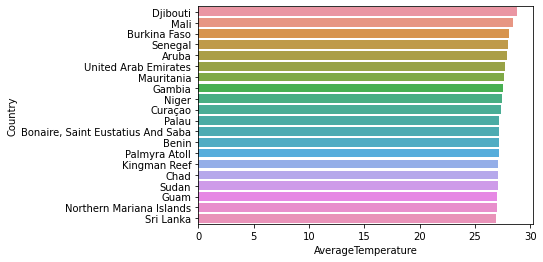

In [221]:
sns.barplot(x=Avg_Temp.sort_values(by='AverageTemperature',ascending=False)['AverageTemperature'][0:20],y=Avg_Temp.sort_values(by='AverageTemperature', ascending=False)['Country'][0:20])

In [222]:
GLobal_Temp=pd.read_csv(r'E:\nano\Data Analytics\DA Projects\Global warming\GlobalTemperatures.csv')
GLobal_Temp.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [223]:
GLobal_Temp['dt'][0].split('-')[0]

'1750'

In [224]:
def fetch_year(date):
    return date.split('-')[0]

In [225]:
GLobal_Temp['years']=GLobal_Temp['dt'].apply(fetch_year)

In [226]:
GLobal_Temp.groupby('years').agg({'LandAverageTemperature':'mean','LandAverageTemperatureUncertainty':'mean'})

,LandAverageTemperature,LandAverageTemperatureUncertainty
years,,
1750,8.719364,2.637818
1751,7.976143,2.781143
1752,5.779833,2.977000
1753,8.388083,3.176000
1754,8.469333,3.494250
...,...,...
2011,9.516000,0.082000
2012,9.507333,0.083417
2013,9.606500,0.097667


In [227]:
data=GLobal_Temp.groupby('years').agg({'LandAverageTemperature':'mean','LandAverageTemperatureUncertainty':'mean'}).reset_index()
data.head()

,years,LandAverageTemperature,LandAverageTemperatureUncertainty
0,1750,8.719364,2.637818
1,1751,7.976143,2.781143
2,1752,5.779833,2.977000
3,1753,8.388083,3.176000
4,1754,8.469333,3.494250


In [228]:
data['Uncertainty top']=data['LandAverageTemperature']+data['LandAverageTemperatureUncertainty']
data['Uncertainty bottom']=data['LandAverageTemperature']-data['LandAverageTemperatureUncertainty']

In [229]:
data.head()

,years,LandAverageTemperature,LandAverageTemperatureUncertainty,Uncertainty top,Uncertainty bottom
0,1750,8.719364,2.637818,11.357182,6.081545
1,1751,7.976143,2.781143,10.757286,5.195000
2,1752,5.779833,2.977000,8.756833,2.802833
3,1753,8.388083,3.176000,11.564083,5.212083
4,1754,8.469333,3.494250,11.963583,4.975083


In [230]:
import plotly.express as px
fig=px.line(data,x="years",y=["Uncertainty top","Uncertainty bottom","LandAverageTemperature"],title="Averange Land Temperature in World",template="plotly_dark")
fig.show()

From the charts you can see, that there is global warming

**Analyzing Average Temperature in each season**

In [231]:
GLobal_Temp.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,years
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN,1750
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN,1750
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN,1750
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN,1750
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN,1750


In [232]:
GLobal_Temp.shape

(3192, 10)

In [233]:
GLobal_Temp['dt']=pd.to_datetime(GLobal_Temp['dt'])

In [234]:
GLobal_Temp['month'] = GLobal_Temp['dt'].dt.month

In [235]:
GLobal_Temp.drop('dt',axis=1,inplace=True)

In [236]:
GLobal_Temp.head()

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,years,month
0,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN,1750,1
1,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN,1750,2
2,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN,1750,3
3,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN,1750,4
4,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN,1750,5


In [237]:
GLobal_Temp.dtypes

LandAverageTemperature                       float64
LandAverageTemperatureUncertainty            float64
LandMaxTemperature                           float64
LandMaxTemperatureUncertainty                float64
LandMinTemperature                           float64
LandMinTemperatureUncertainty                float64
LandAndOceanAverageTemperature               float64
LandAndOceanAverageTemperatureUncertainty    float64
years                                         object
month                                          int64
dtype: object

In [238]:
def get_season(month):
    if month >=3 and month <=5:
        return 'spring'
    elif month >=6 and month <=8:
         return 'summer'
    elif month >=9 and month <=11:
         return 'autumn'
    else:
        return 'winter'

In [239]:
GLobal_Temp['season'] = GLobal_Temp['month'].apply(get_season)

In [240]:
GLobal_Temp.head()

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,years,month,season
0,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN,1750,1,winter
1,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN,1750,2,winter
2,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN,1750,3,spring
3,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN,1750,4,spring
4,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN,1750,5,spring


In [241]:
years=GLobal_Temp['years'].unique()

In [242]:
spring_temps = []
summer_temps = []
autumn_temps = []
winter_temps = []

for year in years:
    current_yr=GLobal_Temp[GLobal_Temp['years']==year]
    spring_temps.append(current_yr[current_yr['season'] == 'spring']['LandAverageTemperature'].mean())
    summer_temps.append(current_yr[current_yr['season'] == 'summer']['LandAverageTemperature'].mean())
    autumn_temps.append(current_yr[current_yr['season'] == 'autumn']['LandAverageTemperature'].mean())
    winter_temps.append(current_yr[current_yr['season'] == 'winter']['LandAverageTemperature'].mean())

In [243]:
season=pd.DataFrame()
season['year']=years
season['spring_temp']=spring_temps
season['summer_temp']=summer_temps
season['autumn_temp']=autumn_temps
season['winter_temp']=winter_temps

In [244]:
season.head()

,year,spring_temp,summer_temp,autumn_temp,winter_temp
0,1750,8.563000,14.518333,8.890000,2.963000
1,1751,6.735000,14.116000,10.673000,1.729000
2,1752,7.035500,NaN,7.587000,2.717000
3,1753,8.627333,14.608333,9.212333,1.104333
4,1754,9.074333,14.208333,8.957333,1.637333


In [245]:
season.columns

Index(['year', 'spring_temp', 'summer_temp', 'autumn_temp', 'winter_temp'], dtype='object')

In [246]:
import plotly.express as px
fig=px.line(season,x="year",y=['spring_temp', 'summer_temp', 'autumn_temp', 'winter_temp'],title="Average Temperature in Each season", template="plotly_dark")
fig.show()

**Analyz Trend in Temperatures for the Top Economies**

***Let’s look at the chart of annual temperature changes in certain continents (we take into consideration one country per continent and mark Greenland as the coldest place on Earth).***

In [247]:
continent = ['Russia', 'United States', 'China', 'Japan', 'Australia', 'India']

In [248]:
GLobal_Temp_country.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
5,1744-04-01,1.530,4.680,Åland
6,1744-05-01,6.702,1.789,Åland
7,1744-06-01,11.609,1.577,Åland
8,1744-07-01,15.342,1.410,Åland


In [249]:
GLobal_Temp_country[GLobal_Temp_country['Country'].isin(continent)]

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
34816,1852-07-01,14.116,1.530,Australia
34817,1852-08-01,15.330,1.400,Australia
34818,1852-09-01,18.740,1.446,Australia
34819,1852-10-01,21.984,1.493,Australia
34820,1852-11-01,24.073,1.466,Australia
...,...,...,...,...
557816,2013-05-01,14.073,0.178,United States
557817,2013-06-01,20.198,0.236,United States
557818,2013-07-01,22.074,0.152,United States
557819,2013-08-01,21.168,0.249,United States


In [250]:
continent_df=GLobal_Temp_country[GLobal_Temp_country['Country'].isin(continent)]

In [251]:
continent_df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
34816,1852-07-01,14.116,1.530,Australia
34817,1852-08-01,15.330,1.400,Australia
34818,1852-09-01,18.740,1.446,Australia
34819,1852-10-01,21.984,1.493,Australia
34820,1852-11-01,24.073,1.466,Australia


In [252]:
continent_df.shape

(13598, 4)

In [253]:
continent_df.shape

(13598, 4)

In [254]:
continent_df['years']=continent_df['dt'].apply(fetch_year)

In [255]:
continent_df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,years
34816,1852-07-01,14.116,1.530,Australia,1852
34817,1852-08-01,15.330,1.400,Australia,1852
34818,1852-09-01,18.740,1.446,Australia,1852
34819,1852-10-01,21.984,1.493,Australia,1852
34820,1852-11-01,24.073,1.466,Australia,1852


In [256]:
continent_df.groupby(['years','Country']).agg({'AverageTemperature':'mean'})

AverageTemperature
years Country                          
1768  United States            5.572750
1769  United States           10.446500
1774  United States            1.603000
1775  United States            9.499167
1776  United States            8.110000
...                                 ...
2013  China                    9.295000
      India                   25.413250
      Japan                   12.964750
      Russia                  -2.263125
      United States           11.297111

[1148 rows x 1 columns]

In [257]:
Avg_Temp=continent_df.groupby(['years','Country']).agg({'AverageTemperature':'mean'}).reset_index()
Avg_Temp.head(10)

,years,Country,AverageTemperature
0,1768,United States,5.572750
1,1769,United States,10.446500
2,1774,United States,1.603000
3,1775,United States,9.499167
4,1776,United States,8.110000
5,1777,United States,8.304750
6,1778,United States,5.362000
7,1779,United States,-0.713667
8,1781,United States,6.253250
9,1782,United States,7.606429


In [258]:
import plotly.express as px
fig=px.line(Avg_Temp,x="years",y=["AverageTemperature"],color='Country',title="Average Land Temperature in World",template="plotly_dark")
fig.show()

**Conclusion:We will see that there has been a global increase trend in temperature, particularly over the last 30 years. This is due to the violent activities of a humankind.**


# USA Map For State Temperatures

In [259]:
Global_Temp_State = pd.read_csv(r'E:\nano\Data Analytics\DA Projects\Global warming\GlobalLandTemperaturesByState.csv')
Global_Temp_State.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
0,1855-05-01,25.544,1.171,Acre,Brazil
1,1855-06-01,24.228,1.103,Acre,Brazil
2,1855-07-01,24.371,1.044,Acre,Brazil
3,1855-08-01,25.427,1.073,Acre,Brazil
4,1855-09-01,25.675,1.014,Acre,Brazil


In [260]:
USA = Global_Temp_State[Global_Temp_State['Country']=='United States']

In [261]:
USA.dropna(inplace=True)

In [262]:
USA['State'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District Of Columbia',
       'Florida', 'Georgia (State)', 'Hawaii', 'Idaho', 'Illinois',
       'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine',
       'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [263]:
State={'Georgia (State)':'Georgia','District Of Columbia':'Columbia'}

In [264]:
USA['State'].replace(State,inplace=True)

In [265]:
USA=USA[['AverageTemperature','State']]

In [266]:
USA_Temp=USA.groupby('State')['AverageTemperature'].mean().reset_index()

In [267]:
USA_Temp.head()

,State,AverageTemperature
0,Alabama,17.066138
1,Alaska,-4.890738
2,Arizona,15.381526
3,Arkansas,15.573963
4,California,14.327677


In [268]:
USA_Temp.shape

(51, 2)

In [269]:
from opencage.geocoder import OpenCageGeocode

In [270]:
key = '1d57a118f60645ed9539c21fdd4960ca'  # get api key from:  https://opencagedata.com/api
geocoder = OpenCageGeocode(key)
query = 'Bijuesca, Spain'  
results = geocoder.geocode(query)
print (results)

[{'annotations': {'DMS': {'lat': "41° 32' 25.83312'' N", 'lng': "1° 55' 13.28232'' W"}, 'MGRS': '30TWL9005499324', 'Maidenhead': 'IN91am99nr', 'Mercator': {'x': -213773.074, 'y': 5064053.763}, 'OSM': {'edit_url': 'https://www.openstreetmap.org/edit?relation=342295#map=17/41.54051/-1.92036', 'note_url': 'https://www.openstreetmap.org/note/new#map=17/41.54051/-1.92036&layers=N', 'url': 'https://www.openstreetmap.org/?mlat=41.54051&mlon=-1.92036#map=17/41.54051/-1.92036'}, 'UN_M49': {'regions': {'ES': '724', 'EUROPE': '150', 'SOUTHERN_EUROPE': '039', 'WORLD': '001'}, 'statistical_groupings': ['MEDC']}, 'callingcode': 34, 'currency': {'alternate_symbols': [], 'decimal_mark': ',', 'html_entity': '&#x20AC;', 'iso_code': 'EUR', 'iso_numeric': '978', 'name': 'Euro', 'smallest_denomination': 1, 'subunit': 'Cent', 'subunit_to_unit': 100, 'symbol': '€', 'symbol_first': 0, 'thousands_separator': '.'}, 'flag': '🇪🇸', 'geohash': 'ezqsk61xh2nts1rzhnmu', 'qibla': 106.81, 'roadinfo': {'drive_on': 'right

In [271]:
lat = results[0]['geometry']['lat']
lon = results[0]['geometry']['lng']
print (lat, lon)

41.5405092 -1.9203562


In [272]:
list_lat=[]
list_long=[]
for state in USA_Temp['State']: # iterate over rows in dataframe
    results = geocoder.geocode(state)   
    lat = results[0]['geometry']['lat']
    lon = results[0]['geometry']['lng']

    list_lat.append(lat)
    list_long.append(lon)

In [273]:
# create new columns from lists    

USA_Temp['lat'] = list_lat   
USA_Temp['lon'] = list_long

In [274]:
USA_Temp.head()

,State,AverageTemperature,lat,lon
0,Alabama,17.066138,33.258882,-86.829534
1,Alaska,-4.890738,64.445961,-149.680909
2,Arizona,15.381526,34.395342,-111.763275
3,Arkansas,15.573963,35.204888,-92.447911
4,California,14.327677,36.701463,-118.755997


In [275]:
import folium
from folium.plugins import HeatMap
basemap=folium.Map()

In [276]:
HeatMap(USA_Temp[['lat','lon','AverageTemperature']],zoom=20,radius=15).add_to(basemap)
basemap

In [277]:
USA_Temp.head()

,State,AverageTemperature,lat,lon
0,Alabama,17.066138,33.258882,-86.829534
1,Alaska,-4.890738,64.445961,-149.680909
2,Arizona,15.381526,34.395342,-111.763275
3,Arkansas,15.573963,35.204888,-92.447911
4,California,14.327677,36.701463,-118.755997


In [278]:
import folium
# Create a map
m = folium.Map(tiles='openstreetmap', zoom_start=2)

In [279]:
# Add points to the map
for id,row in USA_Temp.iterrows():
    folium.Marker(location=[row['lat'],row['lon']], popup=row['AverageTemperature']).add_to(m)

# Display the map
m

# Analyz Average Temperature of Major Indian Cities By Months

In [280]:
Cities=pd.read_csv(r'E:\nano\Data Analytics\DA Projects\Global warming\GlobalLandTemperaturesByCity.csv')
Cities.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [281]:
Cities.shape

(8599212, 7)

In [282]:
India=Cities[Cities['Country']=='India']

In [283]:
India['City'].unique()

array(['Abohar', 'Achalpur', 'Adilabad', 'Adoni', 'Agartala', 'Agra',
       'Ahmadabad', 'Ahmadnagar', 'Aizawl', 'Ajmer', 'Akola', 'Alandur',
       'Alappuzha', 'Aligarh', 'Allahabad', 'Alwar', 'Ambala',
       'Ambarnath', 'Ambattur', 'Ambur', 'Amravati', 'Amritsar', 'Amroha',
       'Anand', 'Anantapur', 'Ara', 'Asansol', 'Aurangabad', 'Avadi',
       'Azamgarh', 'Badlapur', 'Bagaha', 'Bahadurgarh', 'Baharampur',
       'Bahraich', 'Baidyabati', 'Baleshwar', 'Ballia', 'Bally',
       'Balurghat', 'Banda', 'Bangalore', 'Bangaon', 'Bankura',
       'Bansbaria', 'Barakpur', 'Baranagar', 'Barasat', 'Barddhaman',
       'Bareli', 'Baripada', 'Barnala', 'Barsi', 'Basirhat', 'Basti',
       'Batala', 'Beawar', 'Begusarai', 'Belgaum', 'Bellary', 'Bettiah',
       'Bhadravati', 'Bhadreswar', 'Bhagalpur', 'Bharatpur', 'Bharuch',
       'Bhatpara', 'Bhavnagar', 'Bhilai', 'Bhilwara', 'Bhimavaram',
       'Bhind', 'Bhiwandi', 'Bhiwani', 'Bhopal', 'Bhubaneswar', 'Bhuj',
       'Bhusawal', 'Bid',

In [284]:
Cities=['New Delhi','Bangalore','Hyderabad','Pune','Madras','Varanasi','Gurgaon','Visakhapatnam','Ahmadabad','Bokaro']

In [285]:
Cities=India[India['City'].isin(Cities)]

In [286]:
Cities.shape

(26130, 7)

In [287]:
Cities.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
107078,1796-01-01,19.649,2.286,Ahmadabad,India,23.31N,72.52E
107079,1796-02-01,21.632,1.770,Ahmadabad,India,23.31N,72.52E
107080,1796-03-01,24.953,2.427,Ahmadabad,India,23.31N,72.52E
107081,1796-04-01,30.297,1.827,Ahmadabad,India,23.31N,72.52E
107082,1796-05-01,33.223,1.496,Ahmadabad,India,23.31N,72.52E


In [288]:
## remove N & E from lat & Lon
Cities['Latitude']=Cities['Latitude'].str.strip('N')
Cities['Longitude']=Cities['Longitude'].str.strip('E')

In [289]:
Cities.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
107078,1796-01-01,19.649,2.286,Ahmadabad,India,23.31,72.52
107079,1796-02-01,21.632,1.770,Ahmadabad,India,23.31,72.52
107080,1796-03-01,24.953,2.427,Ahmadabad,India,23.31,72.52
107081,1796-04-01,30.297,1.827,Ahmadabad,India,23.31,72.52
107082,1796-05-01,33.223,1.496,Ahmadabad,India,23.31,72.52


In [290]:
Cities['dt']=pd.to_datetime(Cities['dt'])

In [291]:
Cities['Month']=Cities['dt'].dt.month
Cities.drop('dt',axis=1,inplace=True)

In [292]:
Cities.head()

,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,Month
107078,19.649,2.286,Ahmadabad,India,23.31,72.52,1
107079,21.632,1.770,Ahmadabad,India,23.31,72.52,2
107080,24.953,2.427,Ahmadabad,India,23.31,72.52,3
107081,30.297,1.827,Ahmadabad,India,23.31,72.52,4
107082,33.223,1.496,Ahmadabad,India,23.31,72.52,5


In [293]:
Cities.groupby(['Month','City'])['AverageTemperature'].mean().to_frame()

AverageTemperature
Month City                             
1     Ahmadabad               19.411853
      Bangalore               22.713981
      Bokaro                  17.648165
      Gurgaon                 14.238560
      Hyderabad               22.758290
      Madras                  24.346733
      New Delhi               14.238560
      Pune                    20.448205
      Varanasi                15.596651
      Visakhapatnam           20.337286
2     Ahmadabad               21.661030
      Bangalore               24.656619
      Bokaro                  20.786373
      Gurgaon                 17.144980
      Hyderabad               25.317076
      Madras                  25.831405
      New Delhi               17.144980
      Pune                    22.607924
      Varanasi                18.716421
      Visakhapatnam           23.113733
3     Ahmadabad               26.430074
      Bangalore               27.062186
      Bokaro                  26.086569
      Gurgaon                 23.014804
      Hyderabad               28.803543
      Madras                  28.114448
      New Delhi               23.014804
      Pune                    26.287686
      Varanasi                24.651115
      Visakhapatnam           26.711724
4     Ahmadabad               30.544050
      Bangalore               27.988517
      Bokaro                  29.967522
      Gurgaon                 29.004576
      Hyderabad               31.465565
      Madras                  30.441304
      New Delhi               29.004576
      Pune                    29.004401
      Varanasi                30.190039
      Visakhapatnam           29.112643
5     Ahmadabad               32.939000
      Bangalore               27.522754
      Bokaro                  31.246264
      Gurgaon                 33.297051
      Hyderabad               32.702005
      Madras                  32.581952
      New Delhi               33.297051
      Pune                    29.838203
      Varanasi                33.313519
      Visakhapatnam           30.294493
6     Ahmadabad               31.729424
      Bangalore               25.468799
      Bokaro                  30.050829
      Gurgaon                 33.866005
      Hyderabad               29.968469
      Madras                  32.142383
      New Delhi               33.866005
      Pune                    27.220029
      Varanasi                32.570742
      Visakhapatnam           28.549550
7     Ahmadabad               28.713665
      Bangalore               24.400481
      Bokaro                  28.182047
      Gurgaon                 31.174114
      Hyderabad               27.216586
      Madras                  30.658619
      New Delhi               31.174114
      Pune                    24.724738
      Varanasi                29.612919
      Visakhapatnam           26.253600
8     Ahmadabad               27.386733
      Bangalore               24.362910
      Bokaro                  27.685858
      Gurgaon                 29.752423
      Hyderabad               26.573533
      Madras                  29.977352
      New Delhi               29.752423
      Pune                    24.197833
      Varanasi                28.588162
      Visakhapatnam           25.907595
9     Ahmadabad               27.748141
      Bangalore               24.495115
      Bokaro                  27.371810
      Gurgaon                 28.994465
      Hyderabad               26.640239
      Madras                  29.397029
      New Delhi               28.994465
      Pune                    24.565742
      Varanasi                28.238005
      Visakhapatnam           25.930014
10    Ahmadabad               27.279337
      Bangalore               24.091785
      Bokaro                  25.381711
      Gurgaon                 25.866375
      Hyderabad               25.679622
      Madras                  27.741679
      New Delhi               25.866375
      Pune                    24.367426
      Varanasi       

In [294]:
Cities_Temp=Cities.groupby(['Month','City'])['AverageTemperature'].mean().to_frame().reset_index()
Cities_Temp.columns=['month','City','Mean_Temp']
Cities_Temp.head()

,month,City,Mean_Temp
0,1,Ahmadabad,19.411853
1,1,Bangalore,22.713981
2,1,Bokaro,17.648165
3,1,Gurgaon,14.238560
4,1,Hyderabad,22.758290


In [295]:
df=Cities_Temp.merge(Cities,on='City',how='left')
df.head()

,month,City,Mean_Temp,AverageTemperature,AverageTemperatureUncertainty,Country,Latitude,Longitude,Month
0,1,Ahmadabad,19.411853,19.649,2.286,India,23.31,72.52,1
1,1,Ahmadabad,19.411853,21.632,1.770,India,23.31,72.52,2
2,1,Ahmadabad,19.411853,24.953,2.427,India,23.31,72.52,3
3,1,Ahmadabad,19.411853,30.297,1.827,India,23.31,72.52,4
4,1,Ahmadabad,19.411853,33.223,1.496,India,23.31,72.52,5


In [296]:
data=df.drop_duplicates(subset=['month','City'])

In [297]:
data.head()

,month,City,Mean_Temp,AverageTemperature,AverageTemperatureUncertainty,Country,Latitude,Longitude,Month
0,1,Ahmadabad,19.411853,19.649,2.286,India,23.31,72.52,1
2613,1,Bangalore,22.713981,22.672,2.317,India,12.05,77.26,1
5226,1,Bokaro,17.648165,17.806,2.291,India,23.31,86.50,1
7839,1,Gurgaon,14.238560,14.590,2.374,India,28.13,77.27,1
10452,1,Hyderabad,22.758290,22.759,2.322,India,16.87,78.70,1


In [298]:
data2=data[['month','City','Mean_Temp','Country','Latitude','Longitude']]
data2.head()

,month,City,Mean_Temp,Country,Latitude,Longitude
0,1,Ahmadabad,19.411853,India,23.31,72.52
2613,1,Bangalore,22.713981,India,12.05,77.26
5226,1,Bokaro,17.648165,India,23.31,86.50
7839,1,Gurgaon,14.238560,India,28.13,77.27
10452,1,Hyderabad,22.758290,India,16.87,78.70


In [299]:
trace = go.Heatmap(z=data2['Mean_Temp'],
                   x=data2['month'],
                   y=data2['City'],
                  colorscale='Viridis')

In [300]:
data=[trace]
layout = go.Layout(
    title='Average Temperature Of Major Cities By Month',
)

In [301]:
fig = go.Figure(data=data, layout=layout)
fig.show()

# Visualise Temperature on a Map

In [302]:
data2.head()

,month,City,Mean_Temp,Country,Latitude,Longitude
0,1,Ahmadabad,19.411853,India,23.31,72.52
2613,1,Bangalore,22.713981,India,12.05,77.26
5226,1,Bokaro,17.648165,India,23.31,86.50
7839,1,Gurgaon,14.238560,India,28.13,77.27
10452,1,Hyderabad,22.758290,India,16.87,78.70


In [303]:
import folium
# Create a map
m = folium.Map(tiles='openstreetmap', zoom_start=2)

In [304]:
# Add points to the map
for id,row in data2.iterrows():
    folium.Marker(location=[row['Latitude'],row['Longitude']], popup=row['Mean_Temp']).add_to(m)

# Display the map
m